#### CIFAR10 Contains the images of the following classes
- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

2024-06-09 17:00:10.660840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 17:00:11.758983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
def numToClass(index):
    classes = [
        "Airplanes",
        "Cars",
        "Birds",
        "Cats",
        "Deer",
        "Dogs",
        "Frogs",
        "Horses",
        "Ships",
        "Trucks"
    ]

    if 0 <= index < len(classes):
        return classes[index]
    else:
        return None

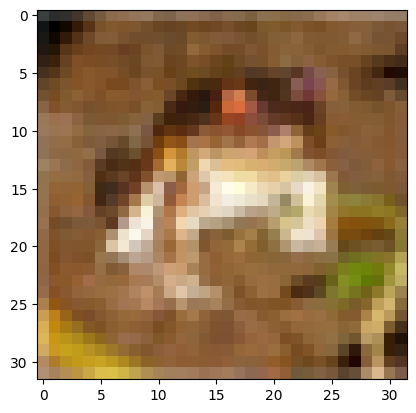

[6]


In [5]:
# Visualizing some input data
range_of_images = 999
step = 999
for i in range(0, range_of_images, step):
    plt.imshow(X_train[i])
    plt.show()
    print(y_train[i])

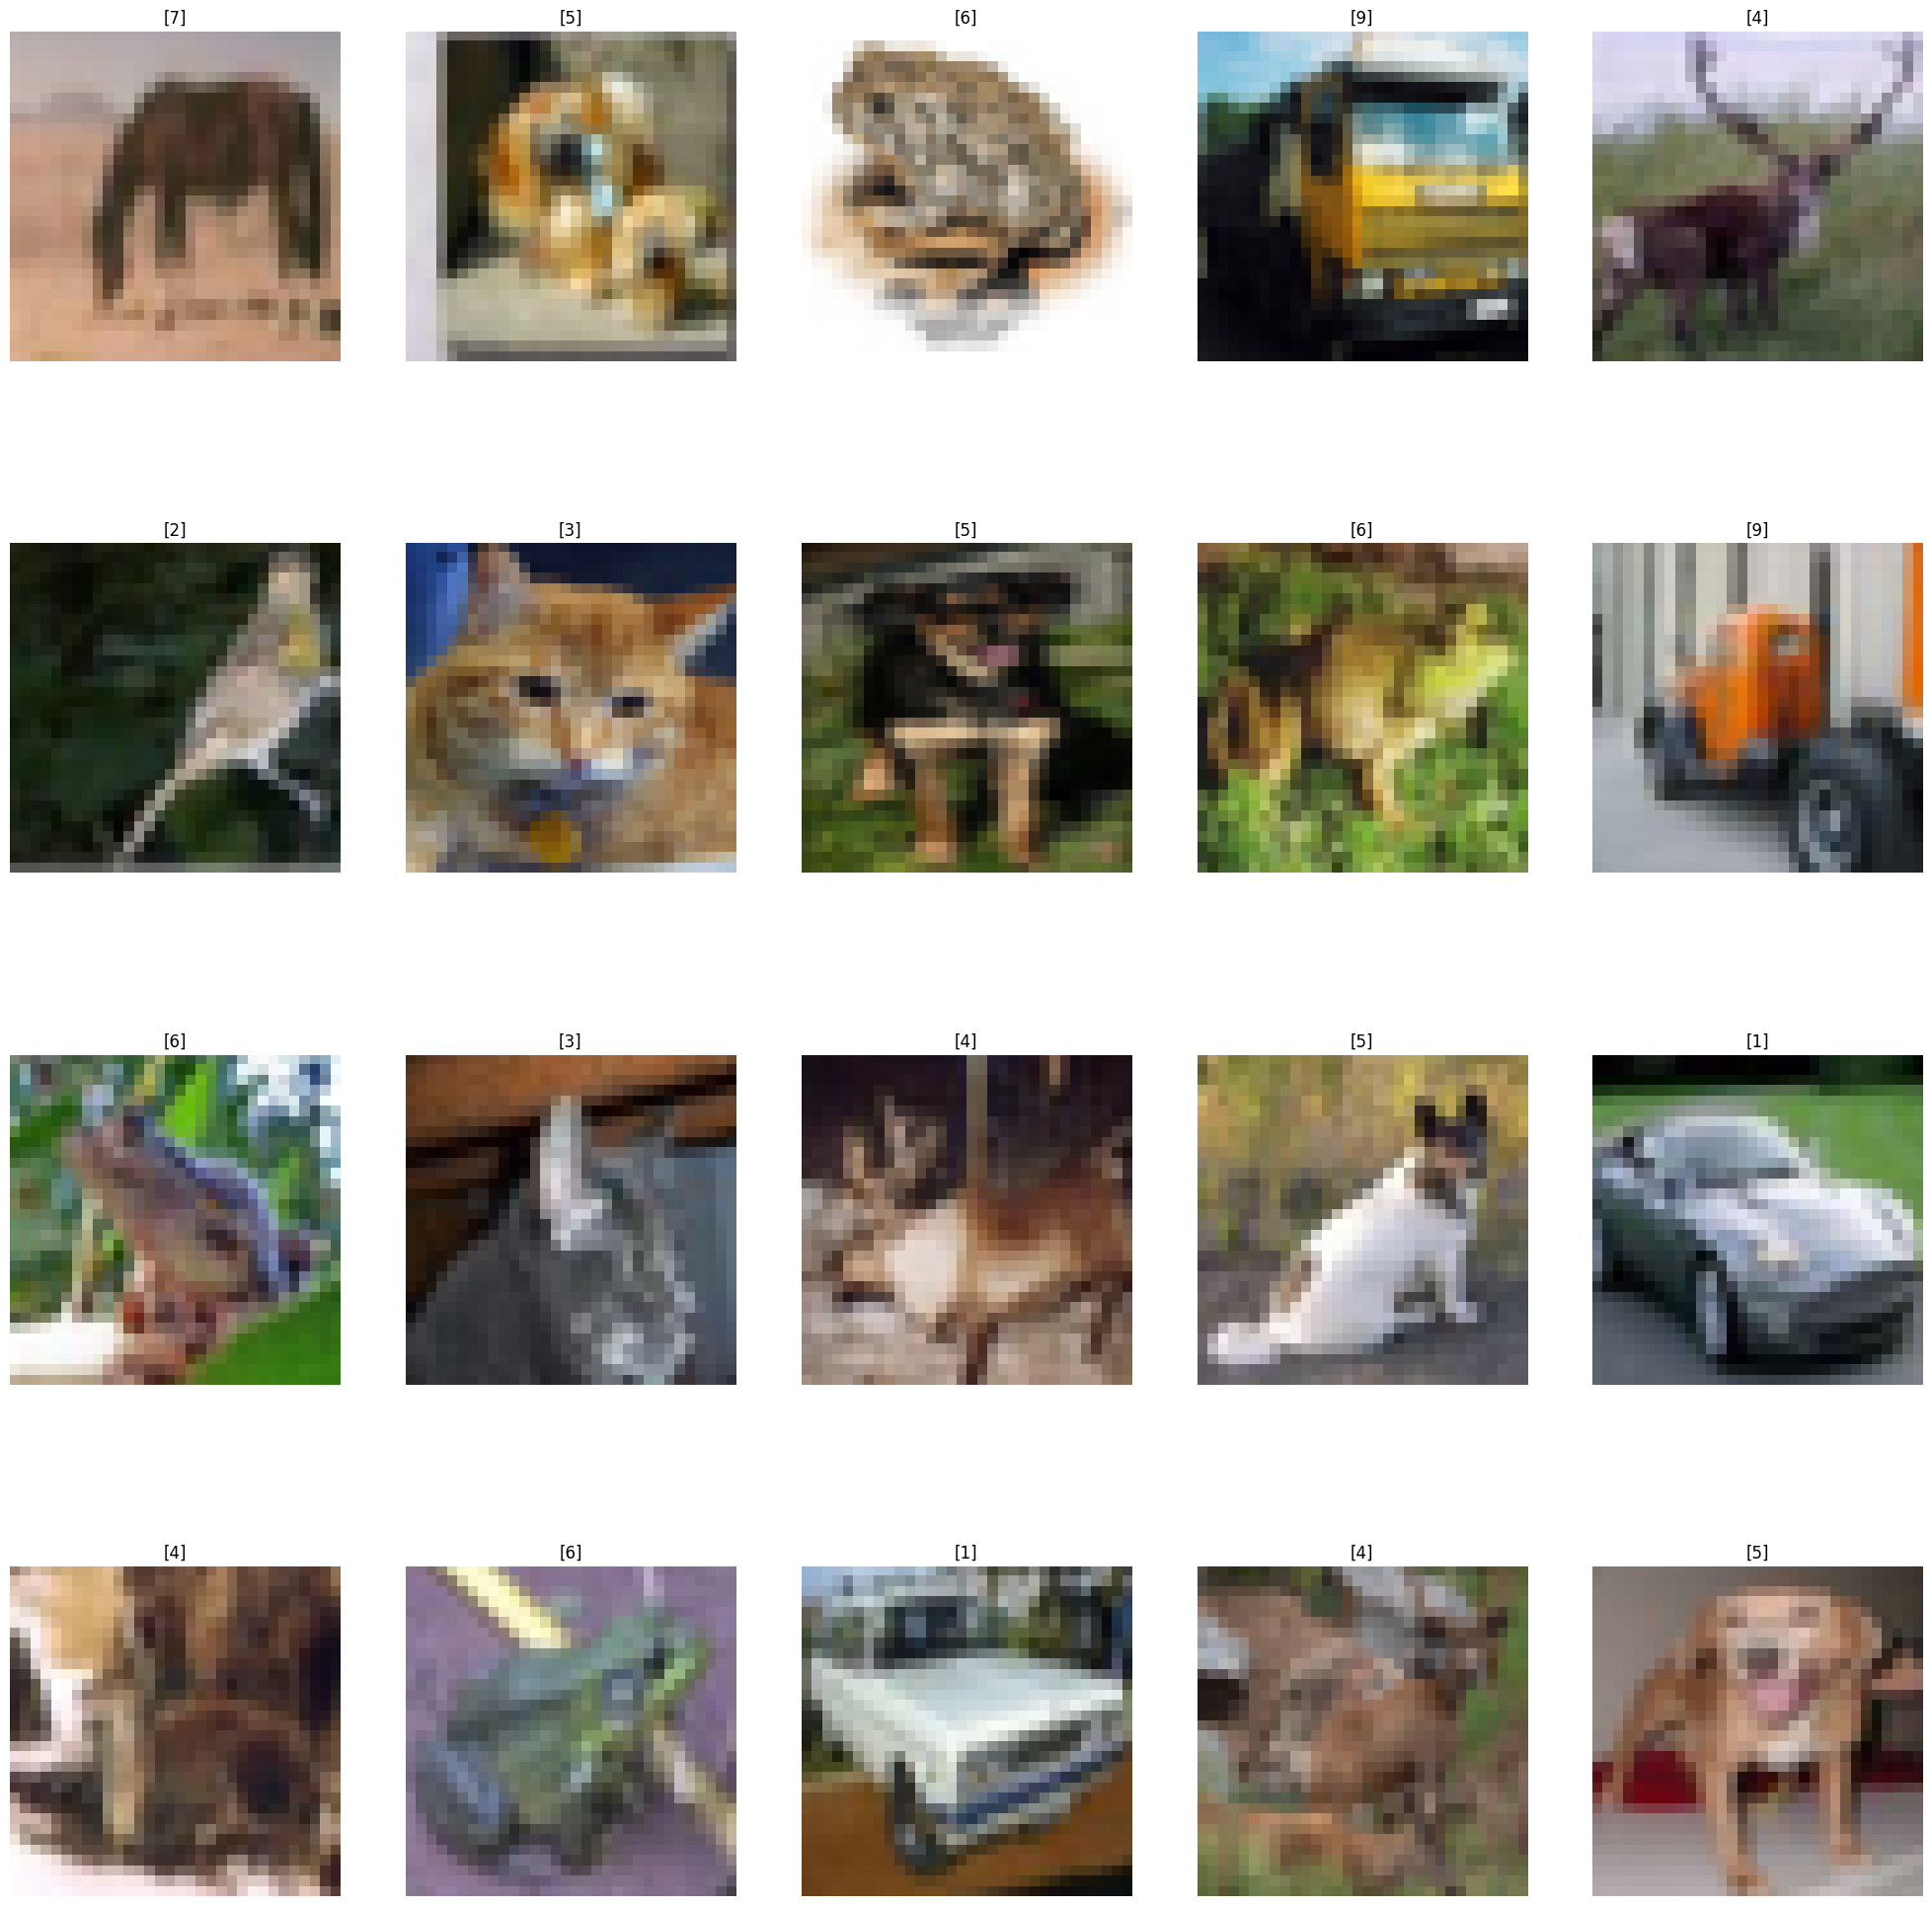

In [6]:
# Printing as a grid

W_grid = 5
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
number_of_categories = 10

In [9]:
print('y_train bfore:', y_train.shape)
y_train


y_train bfore: (50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
print('y_test before:', y_test.shape)
y_test

y_test before: (10000, 1)


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train, number_of_categories)
y_test = keras.utils.to_categorical(y_test, number_of_categories)

In [12]:
print('y_train after:', y_train.shape)
y_train

y_train after: (50000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
print('y_test after:', y_test.shape)
y_test

y_test after: (10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [16]:
X_test


array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

/home/solomons/MachineLearningStuff/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-09 17:00:14.188619: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-09 17:00:14.375901: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for

In [21]:
cnn_model.compile(loss = 'categorical_crossentropy',
                  optimizer = keras.optimizers.RMSprop(learning_rate = 0.001),
                  metrics = ['accuracy'])

#### Model Training without AUGMENTED Data (Default CIFAR10 Dataset)


In [4]:
import tensorflow as tf

# List all available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU is being used.")


No GPU is being used.


In [51]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 100, shuffle = True)

Epoch 1/100


2024-06-09 14:50:49.980840: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


  60/1563 ━━━━━━━━━━━━━━━━━━━━ 2:54 116ms/step - accuracy: 0.0955 - loss: 2.3254

KeyboardInterrupt: 

Evaluation Of the Model


In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
# predicted_classes = cnn_model.predict_classes(X_test)
# predicted_classes
# Deprecated


# Use the model's predict method to get the class probabilities
predictions = cnn_model.predict(X_test)

# Use argmax to convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

In [ ]:
y_test = y_test.argmax(1)
y_test


In [ ]:

L = 7
W = 4
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(numToClass(predicted_classes[i]), numToClass(y_test[i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=0.5)

Heatmap


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_epochs_50.h5')
cnn_model.save(model_path)

#### Training the model with AUGMENTED Data


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generated_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [32]:
generated_data.fit(X_train)

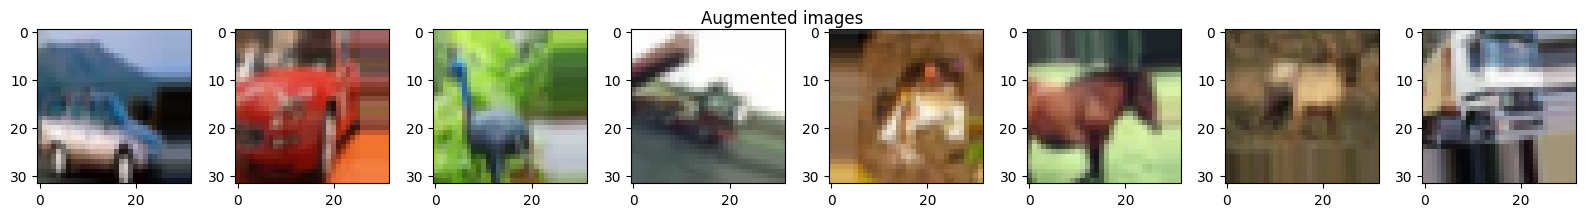

In [33]:
#displaying the generated data

n = 8
X_train_sample = X_train[:n]

fig = plt.figure(figsize = (20,2))
for x_batch in generated_data.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(x_batch[i])
     fig.suptitle('Augmented images')
     plt.show()
     break;

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [36]:
cnn_model.fit(generated_data.flow(X_train, y_train, batch_size = 32), epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.4866 - loss: 1.4488 - val_accuracy: 0.5866 - val_loss: 1.1639
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5287 - loss: 1.3509 - val_accuracy: 0.6249 - val_loss: 1.0649
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5495 - loss: 1.3029 - val_accuracy: 0.6166 - val_loss: 1.0966
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5532 - loss: 1.2843 - val_accuracy: 0.6350 - val_loss: 1.0666
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5685 - loss: 1.2402 - val_accuracy: 0.5638 - val_loss: 1.2617
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5709 - loss: 1.2405 - val_accuracy: 0.5482 - val_loss: 1.6265
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.5788 - loss: 1.2336 - val_accuracy: 0.7046 - val_loss: 0.9048
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 

In [37]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6912 - loss: 0.9776
Test accuracy 0.6886000037193298


In [38]:
# saving the model

import os

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)